In [1]:
import json
from ultralytics import YOLO
from PIL import Image
import arccnet.models.fulldisk.YOLO.utilities as ut
from arccnet.models import labels
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
import numpy as np
import seaborn as sns

In [2]:
data_folder = os.getenv("ARCAFF_DATA_FOLDER", "../../../data/")
dataset_folder = "arccnet-fulldisk-dataset-v20240917"
df_name = "fulldisk-detection-catalog-v20240917.parq"

local_path_root = os.path.join(data_folder, dataset_folder)
YOLO_root_path = os.path.join(data_folder, "YOLO_dataset")

In [3]:
image_name = 'hmi.m_720s.20220828_000000_TAI.3.magnetogram.png'
image_path = os.path.join(YOLO_root_path,'images','train',image_name)

In [4]:
classes = ['Alpha', 'Beta', 'Beta-Gamma', 'Background']
greek_labels = labels.convert_to_greek_label(classes)

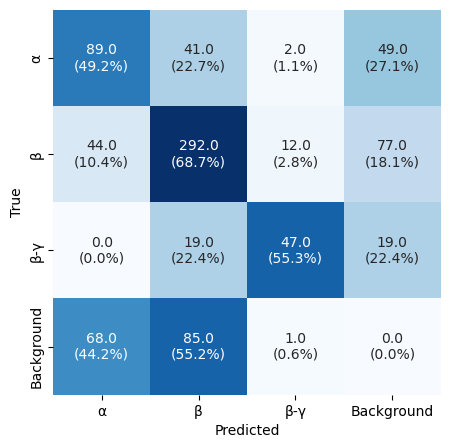

In [5]:
with open('/home/edoardo/Code/ARCAFF/ARCCnet/arccnet/models/trained_models/confusion-matrix-30805.json', 'r') as f:
    json_data = json.load(f)
cm_test = np.array(json_data['matrix'])
# Calculate the row percentages
row_sums = cm_test.sum(axis=1, keepdims=True)
cm_percentage = cm_test / row_sums * 100

# Create a custom annotation that includes both count and percentage
annotations = np.empty_like(cm_test).astype(str)

for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        annotations[i, j] = f'{cm_test[i, j]}\n({cm_percentage[i, j]:.1f}%)'

# Plot the heatmap with the annotations, using cm_percentage for the color mapping
plt.figure(figsize=(5, 5))
sns.heatmap(cm_percentage, annot=annotations, fmt='', cmap='Blues', xticklabels=greek_labels, yticklabels=greek_labels, cbar=False)
#plt.title('Confusion Matrix with Row Percentages')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [6]:
weights_path = '/home/edoardo/Code/ARCAFF/ARCCnet/arccnet/models/trained_models/best-30805.pt'
model = YOLO(weights_path)

In [13]:
test_image = 'mdi.fd_m_96m_lev182.20101024_000000_TAI.data.png'
#test_image = 'mdi.fd_m_96m_lev182.20101027_000000_TAI.data.png'
#test_image = 'mdi.fd_m_96m_lev182.20100116_000000_TAI.data.png'
image_path = os.path.join(YOLO_root_path,'images','val', test_image)


image 1/1 /home/edoardo/Code/ARCAFF/data/YOLO_dataset/images/val/mdi.fd_m_96m_lev182.20101024_000000_TAI.data.png: 1024x1024 2 Alphas, 1 Beta, 178.2ms
Speed: 52.1ms preprocess, 178.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


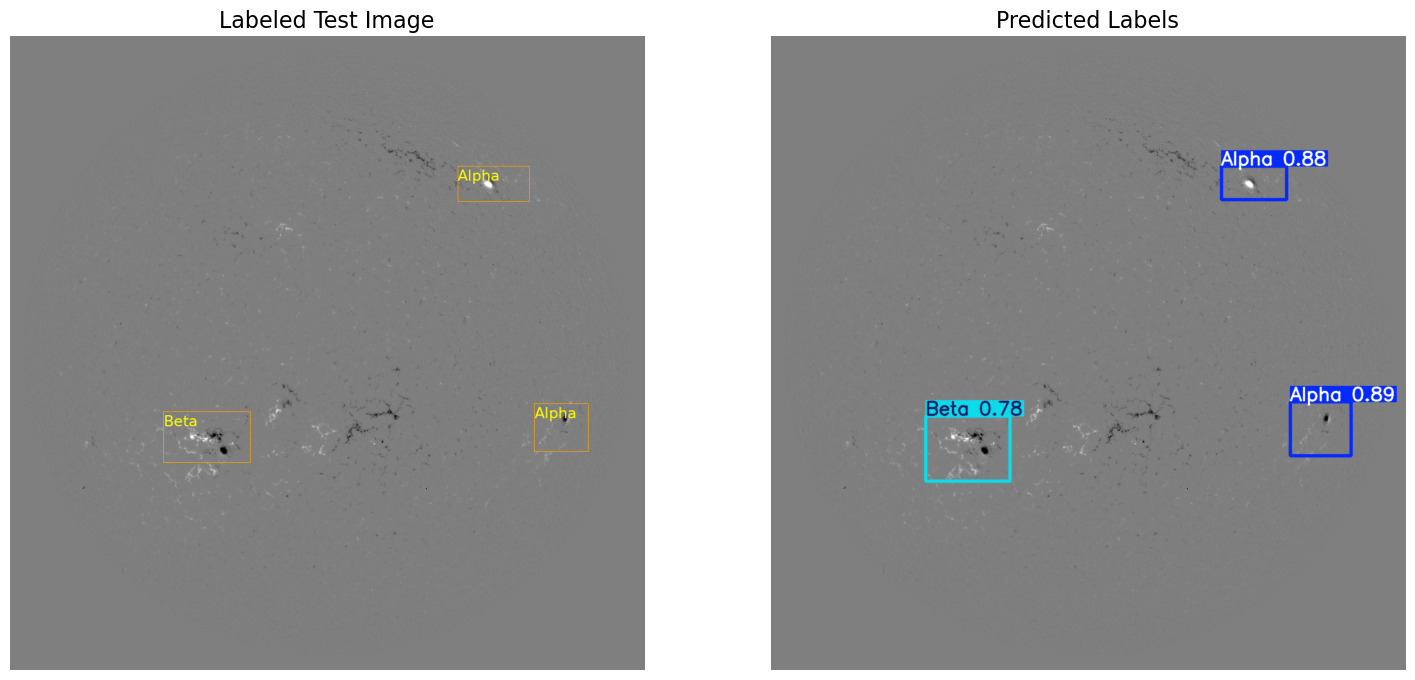

In [14]:
results = model.predict(image_path)

im_bgr = results[0].plot()
im_rgb_predicted = Image.fromarray(im_bgr[..., ::-1])  # Convert BGR to RGB
im_rgb_labels = ut.draw_yolo_labels_on_image(image_path)

# Create a subplot to show the images side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

# Display the image with labels
axs[0].imshow(im_rgb_labels)
axs[0].set_title('Labeled Test Image', fontsize = 16)
axs[0].axis('off')

# Display the predicted labels image
axs[1].imshow(im_rgb_predicted)
axs[1].set_title('Predicted Labels', fontsize = 16)
axs[1].axis('off')

plt.show()